In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv")

In [3]:
df.shape

(101766, 50)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


I think I want to analyse the health data by race so I take a look at the counts.

In [5]:
df['race'].value_counts()

,count
race,
Caucasian,76099
AfricanAmerican,19210
?,2273
Hispanic,2037
Other,1506
Asian,641


I want to take a look at the columns to see what I want to drop.

In [6]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

I want to see the data types and non null values in case I need to change something in the future.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

I want to see the top, unique, and frequency values in the data set at a glance. This gives me the idea to maybe anaylze the data by gender instead of race.

In [8]:
df.describe(include="object")

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,5346,17018,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,3,3,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,Norm,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,2597,8216,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [9]:
df = df.drop(columns=['encounter_id', 'patient_nbr',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change'])

I dropped a bunch of columns to get a cleaner chart and see if there are other connections I might want to make. Does the number of medications given connect to the number of readmissions? What about weight or number of diagnosis?

In [10]:
df.head()

,race,gender,age,weight,num_medications,number_diagnoses,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,1,1,No,NO
1,Caucasian,Female,[10-20),?,18,9,Yes,>30
2,AfricanAmerican,Female,[20-30),?,13,6,Yes,NO
3,Caucasian,Male,[30-40),?,16,7,Yes,NO
4,Caucasian,Male,[40-50),?,8,5,Yes,NO


In [11]:
df.tail()

,race,gender,age,weight,num_medications,number_diagnoses,diabetesMed,readmitted
101761,AfricanAmerican,Male,[70-80),?,16,9,Yes,>30
101762,AfricanAmerican,Female,[80-90),?,18,9,Yes,NO
101763,Caucasian,Male,[70-80),?,9,13,Yes,NO
101764,Caucasian,Female,[80-90),?,21,9,Yes,NO
101765,Caucasian,Male,[70-80),?,3,9,No,NO


I want to see the number of duplicates and null values so I can figure out how to handle them later.

In [12]:
df.isnull().sum()

,0
race,0
gender,0
age,0
weight,0
num_medications,0
number_diagnoses,0
diabetesMed,0
readmitted,0


In [13]:
df.duplicated().sum()

np.int64(73196)

I saw a few ? in the data and I know that won't be helpful. I get a count of them per column to see how many actually exist and think about how I handle them as it could skew the data to just delete them.

In [14]:
question_mark_counts = {}
for column in df.select_dtypes(include='object').columns:
    count = (df[column] == '?').sum()
    if count > 0:
        question_mark_counts[column] = count

for column, count in question_mark_counts.items():
    print(f"Column '{column}': {count} '?' values")

Column 'race': 2273 '?' values
Column 'weight': 98569 '?' values


I replace the ?s with nan and check the null stats again.

In [15]:
df = df.replace('?', np.nan)

In [16]:
df.isnull().sum()

,0
race,2273
gender,0
age,0
weight,98569
num_medications,0
number_diagnoses,0
diabetesMed,0
readmitted,0


In [17]:
df.head(21)

,race,gender,age,weight,num_medications,number_diagnoses,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,1,1,No,NO
1,Caucasian,Female,[10-20),NaN,18,9,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,13,6,Yes,NO
3,Caucasian,Male,[30-40),NaN,16,7,Yes,NO
4,Caucasian,Male,[40-50),NaN,8,5,Yes,NO
5,Caucasian,Male,[50-60),NaN,16,9,Yes,>30
6,Caucasian,Male,[60-70),NaN,21,7,Yes,NO
7,Caucasian,Male,[70-80),NaN,12,8,Yes,>30
8,Caucasian,Female,[80-90),NaN,28,8,Yes,NO
9,Caucasian,Female,[90-100),NaN,18,8,Yes,NO


In [18]:
df = df.drop_duplicates()

The weight column has a lot of null data and is not really neccessary to my analysis so I drop that column and decide to tackle the race data.

In [19]:
df = df.drop(columns=['weight'])
df.head()

,race,gender,age,num_medications,number_diagnoses,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,1,No,NO
1,Caucasian,Female,[10-20),18,9,Yes,>30
2,AfricanAmerican,Female,[20-30),13,6,Yes,NO
3,Caucasian,Male,[30-40),16,7,Yes,NO
4,Caucasian,Male,[40-50),8,5,Yes,NO


I was going to drop the null values in the race column but I decided to change direction and focus on gender. I keep the race column as is since the gender column has no null values. If I decide to analyze race, I'd drop the null race values at that time.

In [20]:
df.isnull().sum()

,0
race,1703
gender,0
age,0
num_medications,0
number_diagnoses,0
diabetesMed,0
readmitted,0


I want a count of all genders in the data. I see the unknown genders listed and decide to clear those since they would not be revelant to my final analysis. I want to stick to male and female for the purposes of this analysis.

In [21]:
df['gender'].value_counts()

,count
gender,
Female,15151
Male,13416
Unknown/Invalid,3


In [22]:
df = df[df['gender'] != 'Unknown/Invalid']
df['gender'].value_counts()

,count
gender,
Female,15151
Male,13416


I want to get the data ready for plotting. I have to group the data to get to what the male and female readmission rates are.

Additionally, I want to try out graphs I never tried before including a pie chart and heat map.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28567 entries, 0 to 101763
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   race              26866 non-null  object
 1   gender            28567 non-null  object
 2   age               28567 non-null  object
 3   num_medications   28567 non-null  int64 
 4   number_diagnoses  28567 non-null  int64 
 5   diabetesMed       28567 non-null  object
 6   readmitted        28567 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


In [24]:
readmission_by_gender = df.groupby(['gender', 'readmitted']).size().unstack(fill_value=0)
print(readmission_by_gender)

readmitted   <30   >30    NO
gender                      
Female      2642  5238  7271
Male        2254  4562  6600


In [25]:
female_readmission_data = readmission_by_gender.loc['Female']
print(female_readmission_data)

readmitted
<30    2642
>30    5238
NO     7271
Name: Female, dtype: int64


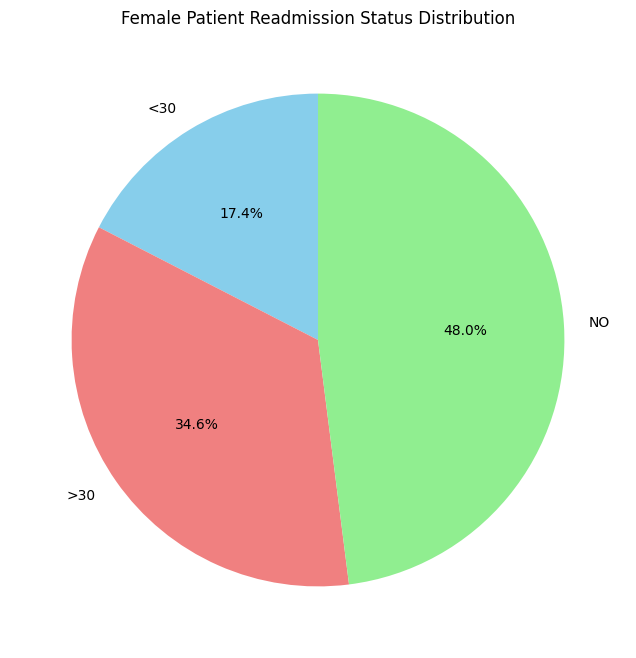

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(female_readmission_data, labels=female_readmission_data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Female Patient Readmission Status Distribution')
plt.ylabel('')
plt.show()

In [27]:
male_readmission_data = readmission_by_gender.loc['Male']
print(male_readmission_data)

readmitted
<30    2254
>30    4562
NO     6600
Name: Male, dtype: int64


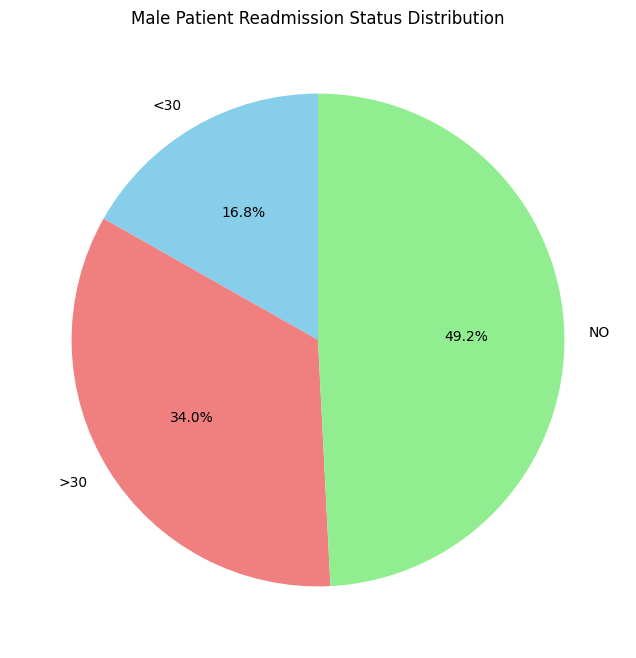

In [28]:
plt.figure(figsize=(8, 8))
plt.pie(male_readmission_data, labels=male_readmission_data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Male Patient Readmission Status Distribution')
plt.ylabel('')
plt.show()

I've never used heat maps before but I find them to be more clear and clean than other types of charts. I can see myself using it again to help me better comprehend certain data

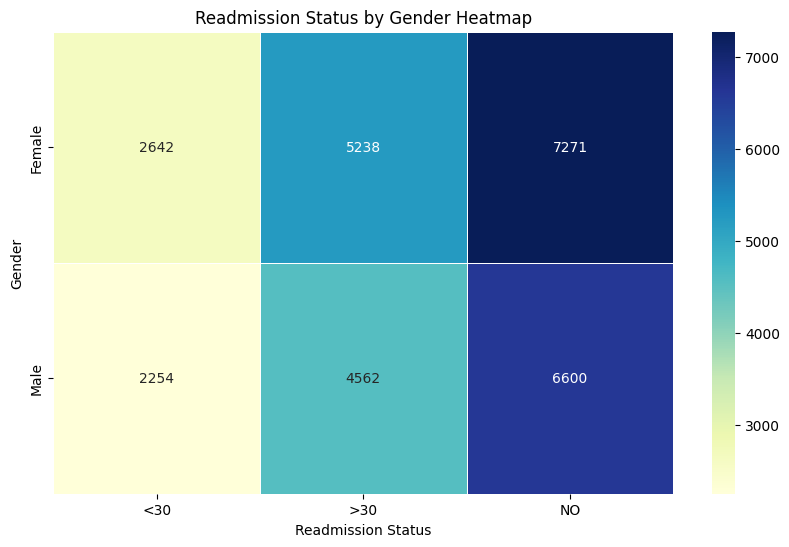

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(readmission_by_gender, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Readmission Status by Gender Heatmap')
plt.xlabel('Readmission Status')
plt.ylabel('Gender')
plt.show()

In [30]:
df_readmitted_after_30 = df[df['readmitted'] == '>30']
print("Shape of df_readmitted_after_30:", df_readmitted_after_30.shape)
df_readmitted_after_30.head()

Shape of df_readmitted_after_30: (9800, 7)


,race,gender,age,num_medications,number_diagnoses,diabetesMed,readmitted
1,Caucasian,Female,[10-20),18,9,Yes,>30
5,Caucasian,Male,[50-60),16,9,Yes,>30
7,Caucasian,Male,[70-80),12,8,Yes,>30
10,AfricanAmerican,Female,[40-50),17,9,Yes,>30
14,AfricanAmerican,Female,[60-70),2,8,Yes,>30


In [31]:
readmitted_gender_diagnoses = df_readmitted_after_30.groupby(['gender', 'number_diagnoses']).size().unstack(fill_value=0)
print("Aggregated data for readmissions after 30 days by gender and number of diagnoses:")
print(readmitted_gender_diagnoses.head())

Aggregated data for readmissions after 30 days by gender and number of diagnoses:
number_diagnoses  1    2    3    4    5    6    7    8     9   10  11  12  13  \
gender                                                                          
Female            21  123  277  463  683  669  735  645  1604   1   2   1   4   
Male              15  108  240  396  538  559  678  567  1440   4   3   2   2   

number_diagnoses  14  15  16  
gender                        
Female             1   2   7  
Male               2   1   7  


In [32]:
df_plot = readmitted_gender_diagnoses.reset_index().melt(id_vars='gender', var_name='number_diagnoses', value_name='count')
print("Melted DataFrame head:")
print(df_plot.head())
print("\nMelted DataFrame info:")
df_plot.info()

Melted DataFrame head:
   gender number_diagnoses  count
0  Female                1     21
1    Male                1     15
2  Female                2    123
3    Male                2    108
4  Female                3    277

Melted DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            32 non-null     object
 1   number_diagnoses  32 non-null     object
 2   count             32 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 900.0+ bytes


I usually default to a regular bar graph but I wanted to see the admission rates of men and women side by side and these graphs seem clearer.

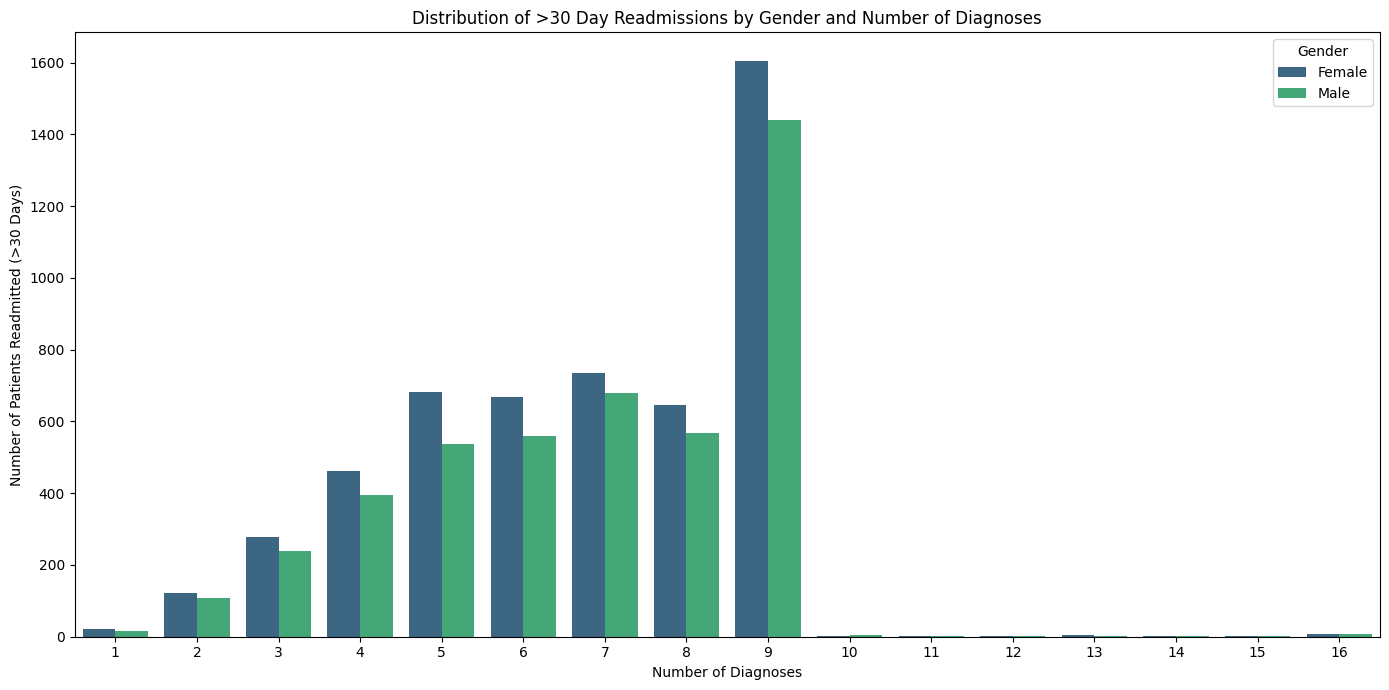

In [33]:
plt.figure(figsize=(14, 7))
sns.barplot(x='number_diagnoses', y='count', hue='gender', data=df_plot, palette='viridis')
plt.title('Distribution of >30 Day Readmissions by Gender and Number of Diagnoses')
plt.xlabel('Number of Diagnoses')
plt.ylabel('Number of Patients Readmitted (>30 Days)')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [34]:
df_readmitted_within_30 = df[df['readmitted'] == '<30']
print("Shape of df_readmitted_within_30:", df_readmitted_within_30.shape)
df_readmitted_within_30.head()

Shape of df_readmitted_within_30: (4896, 7)


,race,gender,age,num_medications,number_diagnoses,diabetesMed,readmitted
11,AfricanAmerican,Male,[60-70),11,7,Yes,<30
12,Caucasian,Female,[40-50),15,8,Yes,<30
16,AfricanAmerican,Male,[50-60),17,8,Yes,<30
46,Caucasian,Female,[70-80),16,7,Yes,<30
50,AfricanAmerican,Male,[50-60),14,9,No,<30


In [35]:
readmitted_within_30_gender_diagnoses = df_readmitted_within_30.groupby(['gender', 'number_diagnoses']).size().unstack(fill_value=0)
df_plot_readmitted_within_30 = readmitted_within_30_gender_diagnoses.reset_index().melt(id_vars='gender', var_name='number_diagnoses', value_name='count')
print("Aggregated and melted data for readmissions within 30 days by gender and number of diagnoses:")
print(df_plot_readmitted_within_30.head())
print("\nMelted DataFrame info:")
df_plot_readmitted_within_30.info()

Aggregated and melted data for readmissions within 30 days by gender and number of diagnoses:
   gender number_diagnoses  count
0  Female                1      6
1    Male                1      6
2  Female                2     33
3    Male                2     23
4  Female                3    100

Melted DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            32 non-null     object
 1   number_diagnoses  32 non-null     object
 2   count             32 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 900.0+ bytes


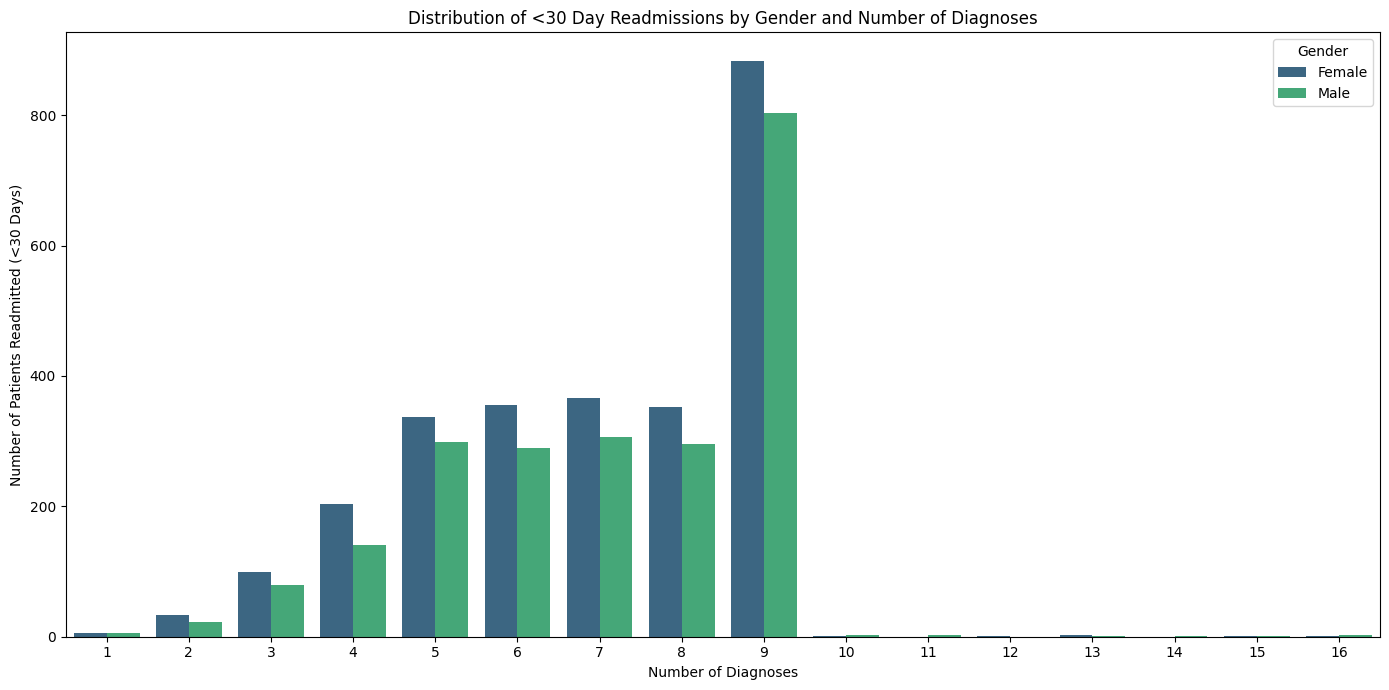

In [36]:
plt.figure(figsize=(14, 7))
sns.barplot(x='number_diagnoses', y='count', hue='gender', data=df_plot_readmitted_within_30, palette='viridis')
plt.title('Distribution of <30 Day Readmissions by Gender and Number of Diagnoses')
plt.xlabel('Number of Diagnoses')
plt.ylabel('Number of Patients Readmitted (<30 Days)')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [37]:
df_not_readmitted = df[df['readmitted'] == 'NO']
print("Shape of df_not_readmitted:", df_not_readmitted.shape)
df_not_readmitted.head()

Shape of df_not_readmitted: (13871, 7)


,race,gender,age,num_medications,number_diagnoses,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,1,No,NO
2,AfricanAmerican,Female,[20-30),13,6,Yes,NO
3,Caucasian,Male,[30-40),16,7,Yes,NO
4,Caucasian,Male,[40-50),8,5,Yes,NO
6,Caucasian,Male,[60-70),21,7,Yes,NO


In [38]:
not_readmitted_gender_diagnoses = df_not_readmitted.groupby(['gender', 'number_diagnoses']).size().unstack(fill_value=0)
df_plot_not_readmitted = not_readmitted_gender_diagnoses.reset_index().melt(id_vars='gender', var_name='number_diagnoses', value_name='count')
print("Aggregated and melted data for not readmitted patients by gender and number of diagnoses:")
print(df_plot_not_readmitted.head())
print("\nMelted DataFrame info:")
df_plot_not_readmitted.info()

Aggregated and melted data for not readmitted patients by gender and number of diagnoses:
   gender number_diagnoses  count
0  Female                1     45
1    Male                1     63
2  Female                2    257
3    Male                2    249
4  Female                3    516

Melted DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            32 non-null     object
 1   number_diagnoses  32 non-null     object
 2   count             32 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 900.0+ bytes


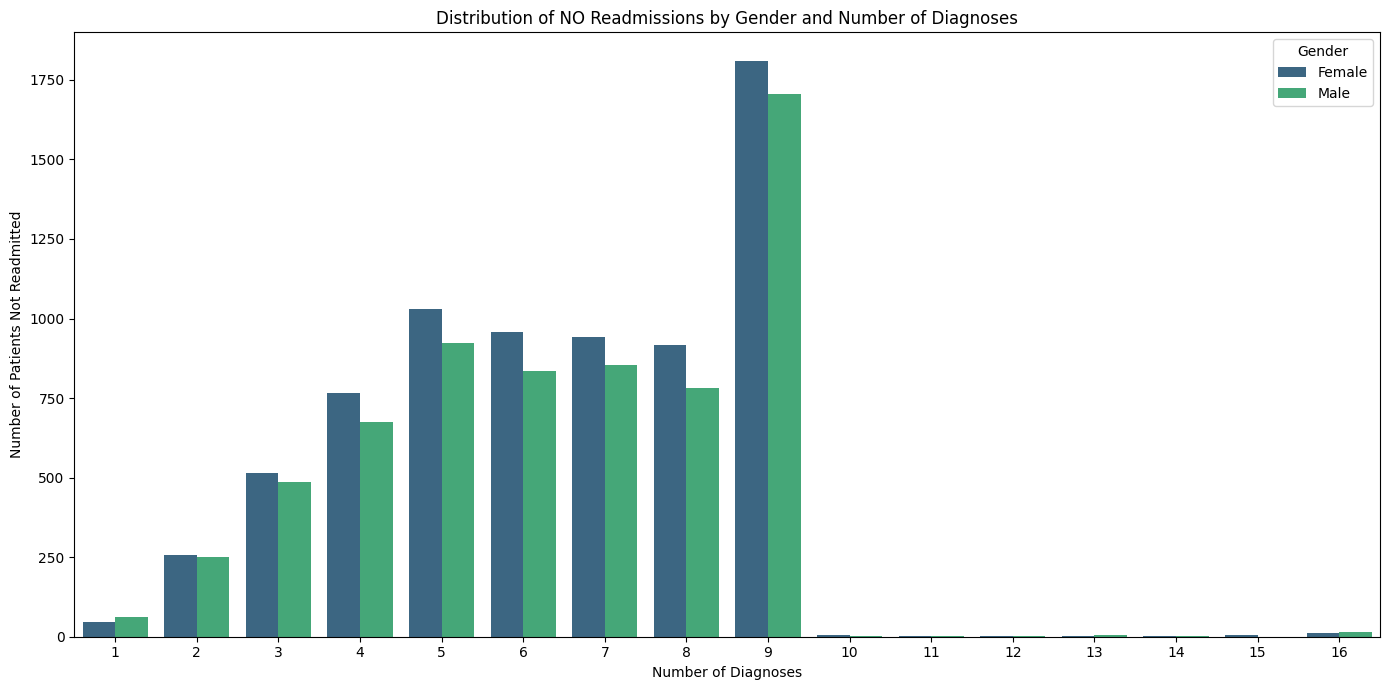

In [39]:
plt.figure(figsize=(14, 7))
sns.barplot(x='number_diagnoses', y='count', hue='gender', data=df_plot_not_readmitted, palette='viridis')
plt.title('Distribution of NO Readmissions by Gender and Number of Diagnoses')
plt.xlabel('Number of Diagnoses')
plt.ylabel('Number of Patients Not Readmitted')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

We can see that the admission rate between men and women aren't actually that far apart. There is a correlation between people having more diagnoses and being readmitted but gender alone does not determine wheter someone will or will not end up back in the hospital.